<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/VAE_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Reshape, Conv2DTranspose, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, )
from tensorflow.keras.optimizers import Adam

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
original_dim = 28 * 28
intermediate_dim = 32
latent_dim = 2

In [6]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
mean = layers.Dense(latent_dim)(h)
log_var = layers.Dense(latent_dim)(h)


In [7]:
#We can use these parameters to sample new similar points from the latent space:

class Sampling(Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return mean + tf.math.exp(0.5*log_var)*tf.random.normal(shape = (tf.shape(mean)[0], tf.shape(mean)[1]))

In [8]:
z = Sampling()([mean,log_var])

In [9]:
# Create encoder
encoder = keras.Model(inputs, [mean, log_var, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')


In [10]:
vae.compile(optimizer='adam', loss=('mean_squared_error'))

In [11]:
vae.fit(x_train, x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1175 - val_loss: 0.0632
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0617 - val_loss: 0.0572
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0566 - val_loss: 0.0546
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0543 - val_loss: 0.0531
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0527 - val_loss: 0.0521
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0520 - val_loss: 0.0513
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0511 - val_loss: 0.0507
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0508 - val_loss: 0.0504
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0504 - val_loss: 0.0502
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0500 - val_loss: 0.0499
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0497 - val_loss: 0.0498
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


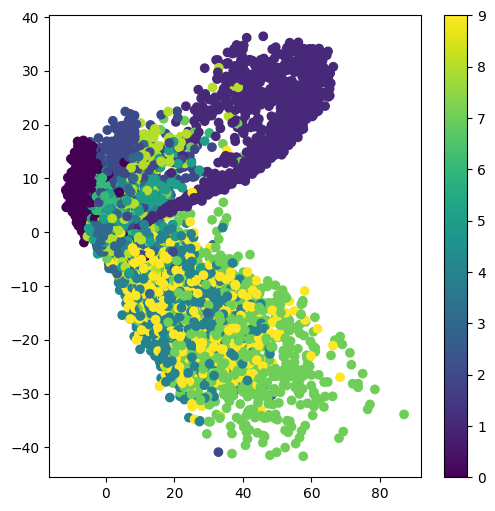

In [12]:
#Because our latent space is two-dimensional, there are a few visualizations that can be done at this point.
#One is to look at the neighborhoods of different classes on the latent 2D plane:

z_test,_,_ = encoder.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(z_test[:,0],z_test[:,1], c=y_test)
plt.colorbar()
plt.show()


In [13]:
scale=1
n=10

grid_x = np.linspace(-scale,scale,n)
grid_y = np.linspace(-scale,scale,n)

print(grid_x)



[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


In [14]:
print(grid_y)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


[[-1. -1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
(1, 784)
[[-1.         -0.77777778]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(1, 784)
[[-1.         -0.55555556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(1, 784)
[[-1.         -0.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1, 784)
[[-1.         -0.11111111]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 784)
[[-1.          0.11111111]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1, 784)
[[-1.          0.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1, 784)
[[-1.          0.55555556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1, 784)
[[-1.          0.77777778]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1, 784)
[[-1.  1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 784)
[[-0.77777778 -1.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1, 784)
[[-0.77777778 -0.77777778]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(1, 784)
[[-0.77777778 -0.55555556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1, 784)
[[-0.77777778 -0.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

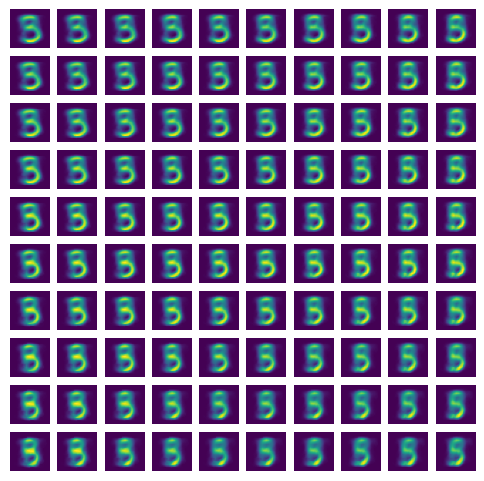

In [15]:
plt.figure(figsize=(6,6))
k=0
for i in grid_x:
  for j in grid_y:
    ax=plt.subplot(n,n,k+1)
    z_sample = np.array([[i, j]])
    print (z_sample)
    x_decoded = decoder.predict(z_sample)
    print (x_decoded.shape)
    digit_picture = x_decoded[0].reshape(28, 28)
    plt.imshow(digit_picture)
    plt.axis('off')
    k+=1